## What was the best Halloween costume you spotted in 2025? 🎃

### 1. Prolific Setup and Authentication
- Import required libraries
- Load API key from environment variables
- Authenticate and fetch your Prolific researcher ID

In [1]:
import os
import json
import yaml
import requests

import pandas as pd
import matplotlib.pyplot as plt

from prolific_helpers import (
    get_researcher_id,
    create_survey,
    create_study,
    publish_study,
    show_study_results,
    plot_survey_responses,
    plot_responses_by_generation,
    plot_responses_by_gender
)

In [2]:
# Load configuration
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [3]:
# Read API tokens for Jupyter Notebook
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
prolific_token = os.environ.get('PROLIFIC_API_TOKEN')
prolific_workspace = os.environ.get('PROLIFIC_WORKSPACE_ID')
prolific_project = os.environ.get('PROLIFIC_PROJECT_ID')

In [5]:
# Set up headers for authenticated requests to the Prolific API
headers = {
    "Authorization": f"Token {prolific_token}",
    "Content-Type": "application/json",
}

In [6]:
# Fetch your Prolific researcher ID
researcher_id = get_researcher_id(headers)

### 2. Survey Creation

In [7]:
# Build survey question from config
question_text = config['survey']['question_text']
print(question_text)

What costume do you think was the most unique this year?


In [8]:
# Create survey using helper function
survey_id = create_survey(headers, researcher_id, config['survey'])
print(f"Survey created with ID: {survey_id}")

Survey created with ID: 690bcd8b25e341e470e28b6d


### 3. Study Publication
- Create the study with all parameters
- Publish it to make it available to participants
- Monitor study status and participant recruitment

In [9]:
# Prepare study configuration from config.yaml
study_config = {
    "name": config['study']['name'],
    "description": config['study']['description'],
    "privacy_notice": config['study']['privacy_notice'],
    "reward": config['participants']['reward'],
    "participants": config['participants']['total_participants'],
    "estimated_time": config['participants']['estimated_time'],
    "max_time": config['participants']['max_time'],
    "device_compatibility": config['device_compatibility']
}

# Create study using helper function
study_id = create_study(headers, survey_id, study_config, prolific_project)
print(f"Study created with ID: {study_id}")

Study created with ID: 690bcd8cc19d46ba6460baea


In [10]:
# Publish study using helper function
status_code = publish_study(headers, study_id)
print(f"Study published with status code: {status_code}")

Study published with status code: 200


# RESULTS
- Monitor participant submissions
- Export results in CSV format
- Load data into pandas DataFrame for analysis
- Calculate completion times and response statistics

In [16]:
# Fetch and display study results using helper function and configured timezone
df = show_study_results(study_id, headers, config['timezone'])

✅ Study Name: One mutiple choice question about Halloween this year
📊 Status: ACTIVE
👥 Total Places: 20
📩 Total Submissions: 17
⏳ Created at: 05 Nov 2025, 02:20 PM PST
🕒 Last Response At: 05 Nov 2025, 02:23 PM PST
⏱️ Time Lapsed: 3 minutes


In [17]:
df.head()

,Submission id,Participant id,Status,Custom study tncs accepted at,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Student status,Employment status,Long-term health condition/disability,Fluent languages,Sexual orientation,Highest education level completed,Degree subject,Work role,Submission approval rate,What costume do you think was the most unique this year?
0,690bcda4cf92bae745a8586b,66b7c04e75051c539d8b4776,AWAITING REVIEW,Not Applicable,2025-11-05T22:20:23.056000Z,2025-11-05T22:20:54.203000Z,NaN,2025-11-05T22:20:57.639000Z,32,NOCODE,...,Yes,Full-Time,Yes,"English, Spanish",homosexual,Graduate degree (MA/MSc/MPhil/other),Health and welfare,Manager,100,Louvre security guard costume
1,690bcda5933bb2cb429e7706,6743825d952f0118a4ab0ac4,AWAITING REVIEW,Not Applicable,2025-11-05T22:20:23.646000Z,2025-11-05T22:21:30.191000Z,NaN,2025-11-05T22:21:30.584000Z,67,NOCODE,...,Yes,Other,No,"English, Other",heterosexual,Undergraduate degree (BA/BSc/other),"Engineering, manufacturing and construction",Individual contributor / Non-manager,100,Labubu
2,690bcda605c31d83a51d0478,677f0032603499bb93fef444,AWAITING REVIEW,Not Applicable,2025-11-05T22:20:24.465000Z,2025-11-05T22:20:46.130000Z,NaN,2025-11-05T22:20:57.643000Z,22,NOCODE,...,No,Full-Time,No,English,heterosexual,Graduate degree (MA/MSc/MPhil/other),Services,Individual contributor / Non-manager,99,I don't know any of these
3,690bcda70e4f69df09ea363a,5d1e4a3ed4b9d60001ec8f1c,AWAITING REVIEW,Not Applicable,2025-11-05T22:20:24.708000Z,2025-11-05T22:21:07.242000Z,NaN,2025-11-05T22:21:07.614000Z,43,NOCODE,...,No,Full-Time,No,"English, French, Russian, Hebrew",heterosexual,Undergraduate degree (BA/BSc/other),Social Sciences,Senior Manager,99,Louvre security guard costume
4,690bcdae07e34f5e8cbd2ee7,614dd304ed948bbfe8c22215,AWAITING REVIEW,Not Applicable,2025-11-05T22:20:32.298000Z,2025-11-05T22:20:47.532000Z,NaN,2025-11-05T22:20:57.646000Z,16,NOCODE,...,No,"Not in paid work (e.g. homemaker', 'retired or...",No,English,heterosexual,Undergraduate degree (BA/BSc/other),Social Sciences,DATA_EXPIRED,99,67 costume


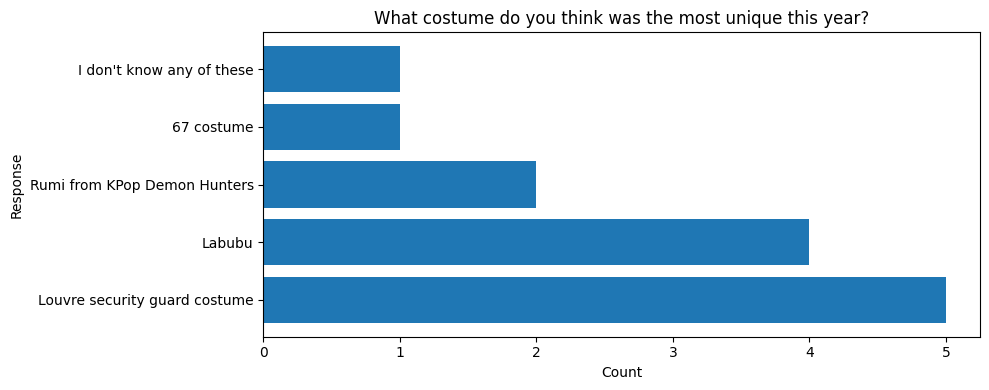

In [18]:
# Plot survey responses using helper function
question_column = config['survey']['question_text']
fig, ax = plot_survey_responses(df, question_column)
plt.show()

### Results by Generation
Breakdown of responses by age generation with labeled age ranges

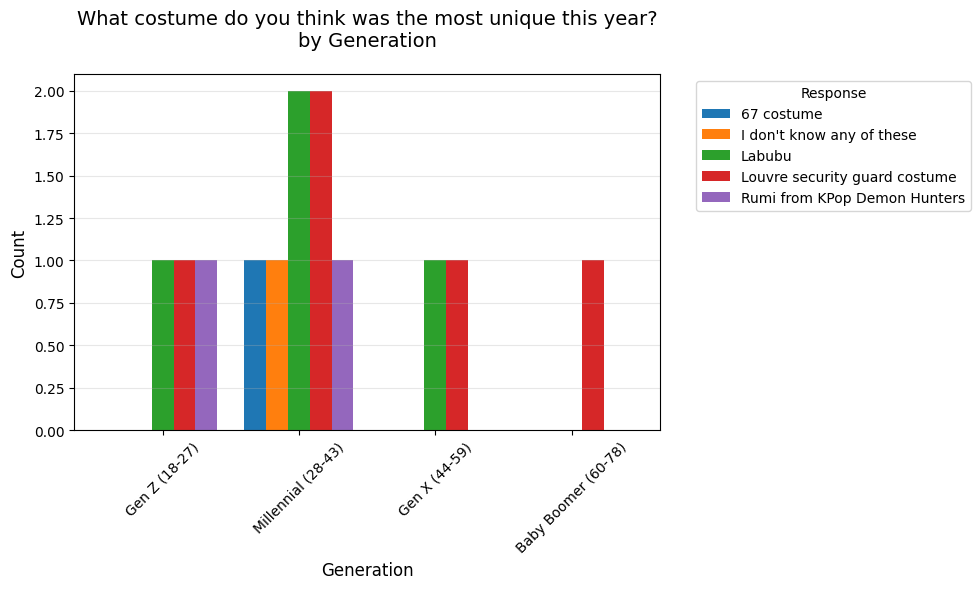

In [19]:
# Plot responses by generation
fig, ax = plot_responses_by_generation(df, question_column)
plt.show()

### Results by Gender
Breakdown of responses by gender/sex

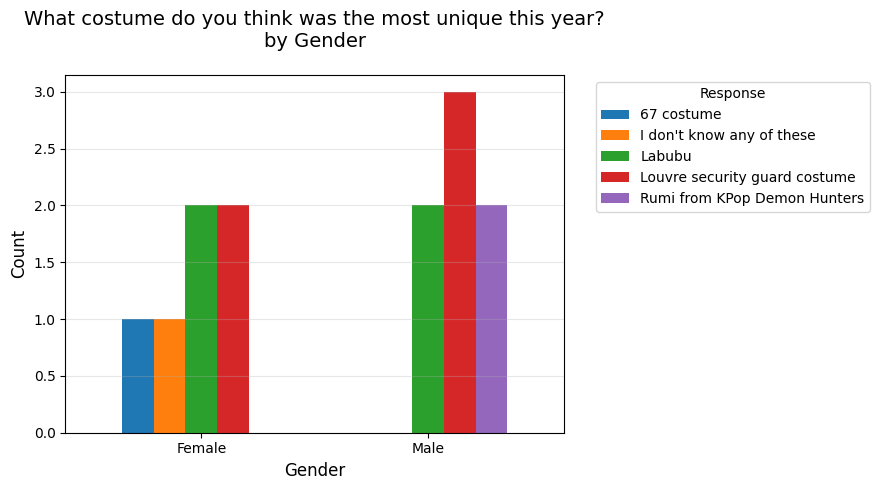

In [20]:
# Plot responses by gender
fig, ax = plot_responses_by_gender(df, question_column)
plt.show()